<a href="https://colab.research.google.com/github/LeticiaKang/HappyVirus/blob/Leticia/Copy_of_%EA%B8%B0%EB%B3%B8_%EB%AA%A8%EB%8D%B8%EB%A1%9C_%EB%B9%84%EA%B5%90%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import tensorflow.keras as k
from tensorflow.keras.preprocessing import image

from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.applications.efficientnet_v2 import EfficientNetV2S
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras.applications.resnet50 import ResNet50

from tensorflow.keras.models import Model
import tensorflow.keras.layers as layers
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import numpy as np

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from time import perf_counter, sleep

In [ ]:
# Data augmentation
def augmentation(target_size, batch_size, class_mode="categorical"):
  # print("start")
  train_datagen = ImageDataGenerator(rescale = 1./255,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    rotation_range=120, 
                                    horizontal_flip = True)

  test_datagen = ImageDataGenerator(rescale = 1./255)

  # Generate training and test sets
  train_set = train_datagen.flow_from_directory(r'/content/drive/MyDrive/테스트용/train',
                                                  target_size = (target_size,target_size),
                                                  batch_size = batch_size,
                                                  class_mode = 'categorical')

  test_set = test_datagen.flow_from_directory(r'/content/drive/MyDrive/테스트용/test',
                                              target_size = (target_size,target_size),                                              # target_size = (299,299),
                                              batch_size = batch_size,
                                              class_mode = 'categorical')

  val_set = test_datagen.flow_from_directory(r'/content/drive/MyDrive/테스트용/val',
                                              target_size = (target_size,target_size),
                                              batch_size = batch_size,
                                              class_mode = 'categorical')
  # print("end")
  print("================================================================================================================")
  return train_set, test_set,val_set 



def for_resnet_50

In [ ]:


def for_resnet_50(base_model, 
                  epoch = 50, optimizer = Adam(lr=1e-6), class_num = 8, pool_size = (7,7)):
  
  train_set, test_set,val_set = augmentation(target_size, batch_size, class_mode="categorical")

  # freezen the layers
  for layer in base_model.layers:
      layer.trainable = False

  # Add a GlobalAveragePooling layer
  x = base_model.output
  x = layers.AveragePooling2D(pool_size = pool_size)(x)  # ★change
  x = layers.Flatten()(x)
  x = layers.Dropout(0.5)(x)
  # fix a number of classes
  predictions = Dense(class_num, activation='softmax')(x) # ★change

  # compile the model
  model = Model(inputs=base_model.input, outputs=predictions)
  model.compile(
    optimizer = optimizer, # ★change
    loss='categorical_crossentropy',
    metrics=['accuracy']
  )

  # fit the model
  start = perf_counter()
  history = model.fit(train_set, epochs = epoch, validation_data = val_set) # ★change # ★change # ★change
  end = perf_counter()

  # print the learning time
  print(f"Time : {end-start}")

  result_graph(history, model, test_set)

## def result_graph(history):

In [ ]:
def result_graph(history, model, test_set):
   # show the graph of train and validation loss/acc 
  import matplotlib.pyplot as plt
  fig, loss = plt.subplots()

  acc = loss.twinx()

  loss.plot(history.history['loss'], 'y', label='train loss')
  loss.plot(history.history['val_loss'], 'r', label='val loss')

  acc.plot(history.history['accuracy'], 'b', label='train acc')
  acc.plot(history.history['val_accuracy'], 'g', label='val acc')

  loss.set_xlabel('epoch')
  loss.set_ylabel('loss')
  acc.set_ylabel('accuray')

  loss.legend(loc='upper left')
  acc.legend(loc='lower left')

  plt.grid()
  plt.show()
  print("================================================================================================================")

  # Evaluate the model on the test set
  result= model.evaluate_generator(test_set) #test_loss, test_acc # ★change
  print('loss:', round(result[0]))
  print('accuracy:', round(result[1], 5))

## def Inception_V3

In [ ]:
def for_Inception_V3(base_model, epoch = 50, target_size = 299, batch_size = 16,
                     optimizer ="adma", class_num = 8):
  
  train_set, test_set,val_set = augmentation(target_size, batch_size, class_mode="categorical")

  # freezen the layers
  for layer in base_model.layers:
      layer.trainable = False

  # Add a GlobalAveragePooling layer
  x = base_model.output
  x = layers.GlobalAveragePooling2D()(x)
  x = layers.Dense(1024, activation='relu')(x)
  x = layers.Dropout(0.2)(x)
  predictions = Dense(class_num, activation='softmax')(x) # ★change

  # compile the model
  model = Model(inputs=base_model.input, outputs=predictions)
  model.compile(
    optimizer = optimizer, # ★change
    loss='categorical_crossentropy',
    metrics=['accuracy']
  )

  # fit the model
  start = perf_counter()
  history = model.fit(train_set, epochs = epoch, validation_data = val_set) # ★change # ★change # ★change
  end = perf_counter()

  # print the learning time
  print(f"Time : {end-start}")

  result_graph(history, model, test_set)

  return history, model, test_set

## Resnet50

Found 221 images belonging to 8 classes.
Found 73 images belonging to 8 classes.
Found 73 images belonging to 8 classes.


Epoch 1/50
4/4 [==============================] - 17s 4s/step - loss: 2.4618 - accuracy: 0.1357 - val_loss: 2.0738 - val_accuracy: 0.1096
Epoch 2/50
4/4 [==============================] - 11s 3s/step - loss: 2.3730 - accuracy: 0.1176 - val_loss: 2.0940 - val_accuracy: 0.1370
Epoch 3/50
4/4 [==============================] - 11s 3s/step - loss: 2.3858 - accuracy: 0.1222 - val_loss: 2.0915 - val_accuracy: 0.1781
Epoch 4/50
4/4 [==============================] - 11s 3s/step - loss: 2.3835 - accuracy: 0.1131 - val_loss: 2.0690 - val_accuracy: 0.2055
Epoch 5/50
4/4 [==============================] - 11s 3s/step - loss: 2.3149 - accuracy: 0.1493 - val_loss: 2.0640 - val_accuracy: 0.1781
Epoch 6/50
4/4 [==============================] - 11s 3s/step - loss: 2.2918 - accuracy: 0.1176 - val_loss: 2.0688 - val_accuracy: 0.1370
Epoch 7/50
4/4 [==============================] - 11s 3s/step - loss: 2.1699 - accuracy: 0.1448 - val_loss: 2.0604 - val_accuracy: 0.1507
Epoch 8/50
4/4 [==================

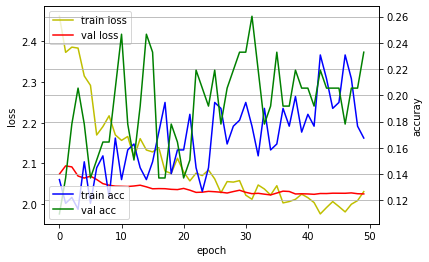

<ipython-input-54-229e9c2e83fe>:60: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  result= model.evaluate_generator(test_set) #test_loss, test_acc # ★change


loss: 2
accuracy: 0.20548


In [ ]:
train_set, test_set,val_set = augmentation(224, 64, class_mode="categorical")

input_tensor = tf.keras.layers.Input(shape=(224, 224, 3))

base_model = ResNet50(weights='imagenet', include_top=False,input_tensor=input_tensor)

for_resnet_50(base_model, epoch = 50, optimizer = Adam(lr=0.0001), class_num = 8, pool_size = (7,7))


## InceptionV3

In [ ]:
# from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications import InceptionV3

In [ ]:
def for_Inception_V3(base_model, epoch = 50, target_size = 299, batch_size = 16,
                     optimizer ="adma", class_num = 8):
  
  train_set, test_set,val_set = augmentation(target_size, batch_size, class_mode="categorical")

  # freezen the layers
  for layer in base_model.layers:
      layer.trainable = False

  # Add a GlobalAveragePooling layer
  x = base_model.output
  x = layers.GlobalAveragePooling2D()(x)
  x = layers.Dense(1024, activation='relu')(x)
  x = layers.Dropout(0.2)(x)
  predictions = Dense(class_num, activation='softmax')(x) # ★change

  # compile the model
  model = Model(inputs=base_model.input, outputs=predictions)
  model.compile(
    optimizer = optimizer, # ★change
    loss='categorical_crossentropy',
    metrics=['accuracy']
  )

  # fit the model
  start = perf_counter()
  history = model.fit(train_set, epochs = epoch, validation_data = val_set) # ★change # ★change # ★change
  end = perf_counter()

  # print the learning time
  print(f"Time : {end-start}")

  result_graph(history, model, test_set)

  return history, model, test_set

Found 221 images belonging to 8 classes.
Found 73 images belonging to 8 classes.
Found 73 images belonging to 8 classes.
Epoch 1/50
14/14 [==============================] - 20s 1s/step - loss: 3.2217 - accuracy: 0.2081 - val_loss: 1.9292 - val_accuracy: 0.3288
Epoch 2/50
14/14 [==============================] - 15s 1s/step - loss: 1.4255 - accuracy: 0.5158 - val_loss: 1.2256 - val_accuracy: 0.6164
Epoch 3/50
14/14 [==============================] - 14s 1s/step - loss: 1.1387 - accuracy: 0.5928 - val_loss: 0.9386 - val_accuracy: 0.7123
Epoch 4/50
14/14 [==============================] - 14s 1s/step - loss: 0.8333 - accuracy: 0.7240 - val_loss: 0.8990 - val_accuracy: 0.6438
Epoch 5/50
14/14 [==============================] - 15s 1s/step - loss: 0.6735 - accuracy: 0.7873 - val_loss: 0.7788 - val_accuracy: 0.7397
Epoch 6/50
14/14 [==============================] - 15s 1s/step - loss: 0.5624 - accuracy: 0.8235 - val_loss: 0.8954 - val_accuracy: 0.6849
Epoch 7/50
14/14 [=====================

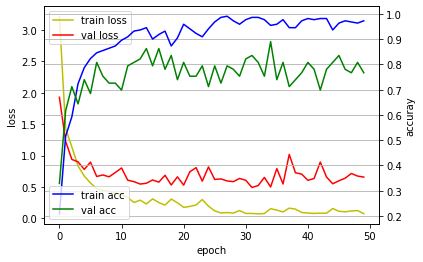

<ipython-input-40-53204e64e21b>:26: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  result= model.evaluate_generator(test_set) #test_loss, test_acc # ★change


loss: 0
accuracy: 0.87671


In [ ]:
input_tensor = tf.keras.layers.Input(shape=(299, 299, 3))

base_model = InceptionV3(weights='imagenet', include_top=False,input_tensor=input_tensor)

history, model, test_set = for_Inception_V3(base_model ,  epoch = 50, target_size = 299, batch_size = 16,
                                             optimizer = "adam", class_num = 8)         #Adam(lr=0.001)

Inception - try2

In [ ]:
def for_Inception_V3(base_model, epoch = 50, target_size = 299, batch_size = 16,
                     optimizer ="adma", class_num = 8):
  
  train_set, test_set,val_set = augmentation(target_size, batch_size, class_mode="categorical")

  # freezen the layers
  for layer in base_model.layers:
      layer.trainable = False

  # Add a GlobalAveragePooling layer
  x = base_model.output
  x = layers.GlobalMaxPooling2D()(x)
  x = layers.Dense(1024, activation='relu')(x)
  x = layers.Dropout(0.2)(x)
  predictions = Dense(class_num, activation='softmax')(x) # ★change

  # compile the model
  model = Model(inputs=base_model.input, outputs=predictions)
  model.compile(
    optimizer = optimizer, # ★change
    loss='categorical_crossentropy',
    metrics=['accuracy']
  )

  # fit the model
  start = perf_counter()
  history = model.fit(train_set, epochs = epoch, validation_data = val_set) # ★change # ★change # ★change
  end = perf_counter()

  # print the learning time
  print(f"Time : {end-start}")

  result_graph(history, model, test_set)

  return history, model, test_set

In [ ]:
input_tensor = tf.keras.layers.Input(shape=(299, 299, 3))

base_model = InceptionV3(weights='imagenet', include_top=False,input_tensor=input_tensor)

history, model, test_set = for_Inception_V3(base_model ,  epoch = 50, target_size = 299, batch_size = 16, optimizer = "", class_num = 8)         #Adam(lr=0.001)

Found 221 images belonging to 8 classes.
Found 73 images belonging to 8 classes.
Found 73 images belonging to 8 classes.


ValueError: ignored